<a href="https://colab.research.google.com/github/PolisenoRiccardo/python/blob/main/Esercizio_Pandas_e_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df

,area,reg,eta,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


1. il numero di record presente nel file

In [13]:
len(df)

189

2. il numero di regioni presente nel file

In [14]:
len(df.groupby('reg').count())

21

3. il numero di abitanti di ogni regione. Ordinare in ordine decrescente sul numero di abitanti

In [15]:
df.groupby('reg').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False)

,totale_popolazione
reg,
Lombardia,9904997
Lazio,5530930
Campania,5484138
Veneto,4684641
Sicilia,4629898
Emilia-Romagna,4300226
Piemonte,4175308
Puglia,3819923
Toscana,3583122


4. la regione con il numero di abitanti più alto

In [16]:
df.groupby('reg').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False).head(1).drop('totale_popolazione', axis=1)

""
reg
Lombardia


5. il numero medio di abitanti delle regioni

In [17]:
df.groupby('reg').sum().mean()

totale_popolazione    2.745241e+06
dtype: float64

6. le regioni che hanno più abitanti della media degli abitanti delle regioni

In [18]:
dfoup = df.groupby('reg').sum() > df.groupby('reg').sum().mean()
dfoup[dfoup.totale_popolazione == True].index

Index(['Campania', 'Emilia-Romagna', 'Lazio', 'Lombardia', 'Piemonte',
       'Puglia', 'Sicilia', 'Toscana', 'Veneto'],
      dtype='object', name='reg')

7. la regione che ha più abitanti nella fascia 12-19

In [19]:
df[(df.totale_popolazione == df[df.eta == '12-19']['totale_popolazione'].max()) & (df.eta == '12-19')]['reg']

73    Lombardia
Name: reg, dtype: object

8. il numero di abitanti per ogni fascia d'età

In [20]:
df.groupby('eta').sum()

,totale_popolazione
eta,
05-11,3656069
12-19,4620379
20-29,6040323
30-39,6782798
40-49,8781291
50-59,9619202
60-69,7531587
70-79,6016425
80+,4601980


9. la fascia d'età con più abitanti

In [21]:
df.groupby('eta').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False).head(1).drop('totale_popolazione', axis=1)

""
eta
50-59


10.  un grafico a barre orizzontali per l'esercizio 3

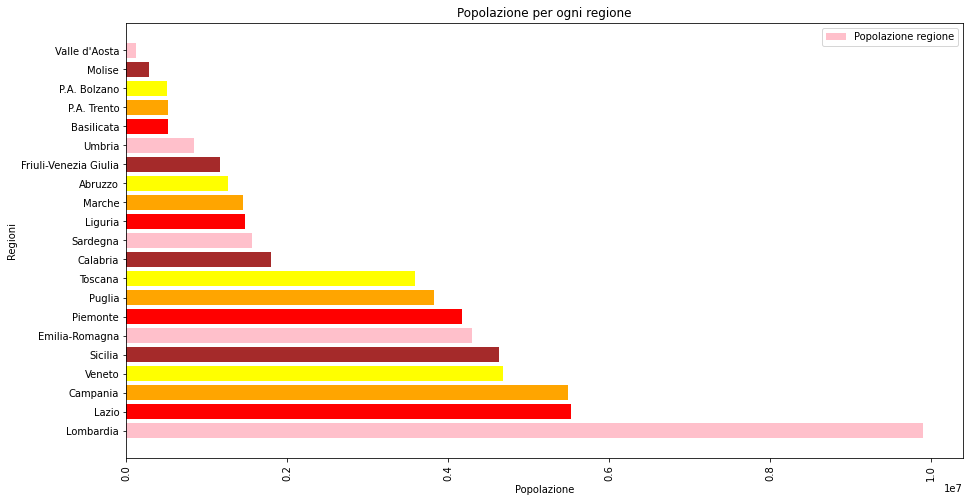

In [22]:
dfdati = df.groupby('reg').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False)
labels = dfdati.index
dati = dfdati['totale_popolazione']


fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='Popolazione regione', color=['Pink', 'red', 'orange', 'yellow','brown'])
plt.xticks(rotation=90)
ax.set_title('Popolazione per ogni regione')
ax.set_xlabel('Popolazione')
ax.set_ylabel('Regioni')
ax.legend()

11. un grafico a barre verticali per l'esercizio 8

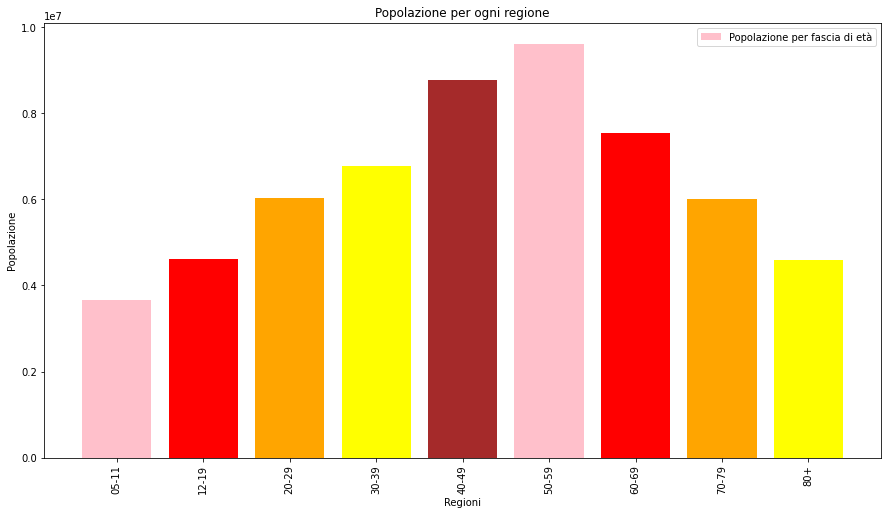

In [23]:
dfdati = df.groupby('eta').sum()
labels = dfdati.index
dati = dfdati['totale_popolazione']


fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Popolazione per fascia di età', color=['Pink', 'red', 'orange', 'yellow','brown'])
plt.xticks(rotation=90)
ax.set_title('Popolazione per ogni regione')
ax.set_xlabel('Regioni')
ax.set_ylabel('Popolazione')
ax.legend()

12. un grafico a torta per l'esercizio 3 che riporti le percentuali

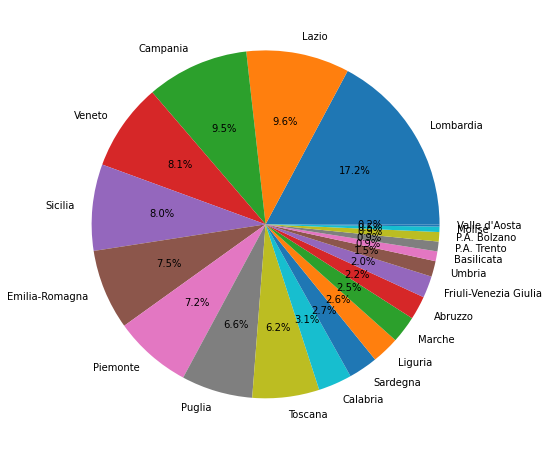

In [24]:
dfdati = df.groupby('reg').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False)
labels = dfdati.index
dati = dfdati['totale_popolazione']
plt.figure(figsize=(15, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%')
plt.show()